In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [31]:
# Checking for NaN values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [32]:
# Removing data which is not required

df.pop('RowNumber')
df.pop('CustomerId')
df.pop('Surname')
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [33]:
# Encoding Geography and Gender
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["Geography"] = ord_enc.fit_transform(df[["Geography"]])
df["Gender"] = ord_enc.fit_transform(df[["Gender"]])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,1
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,0
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,1
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1.0,39,5,0.00,2,1,0,96270.64,0
9996,516,0.0,1.0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0.0,0.0,36,7,0.00,1,0,1,42085.58,1
9998,772,1.0,1.0,42,3,75075.31,2,1,0,92888.52,1


In [34]:
# Normalizing data
df = df/df.max()


In [35]:
# Target column
def to_int(x):
    return int(x)
target = df['Exited']
target = target.apply(to_int)
target

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [36]:
# Removing target from input
df.pop('Exited')

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    1.0
9998    1.0
9999    0.0
Name: Exited, Length: 10000, dtype: float64

In [37]:
# splitting train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.15, random_state=42)

In [38]:
# Converting to tensors
input_train = tf.convert_to_tensor(X_train)
input_test = tf.convert_to_tensor(X_test)
output_train = tf.convert_to_tensor(y_train)
output_test = tf.convert_to_tensor(y_test)
output_test

<tf.Tensor: shape=(1500,), dtype=int64, numpy=array([0, 0, 0, ..., 0, 1, 0])>

In [39]:
num_features = len(input_train[0])
num_features

10

MODEL 1
(128, 0, 0)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               1408      
                                                                 
 dense_29 (Dense)            (None, 0)                 0         
                                                                 
 dense_30 (Dense)            (None, 0)                 0         
                                                                 
 dense_31 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1409 (5.50 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
240/240 [==============================] - 2s 4ms/step - loss: 0.5142 - accuracy: 0.7941 - val_loss: 0.4998 - val_accu

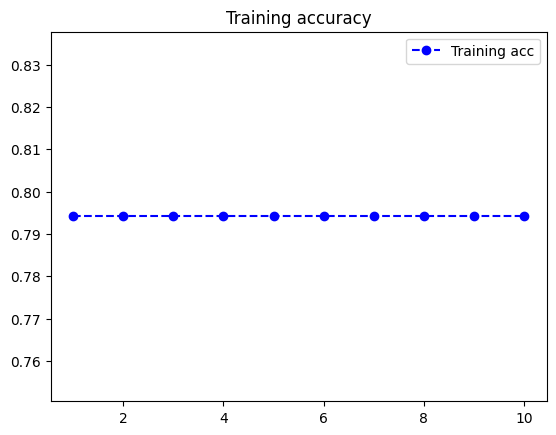

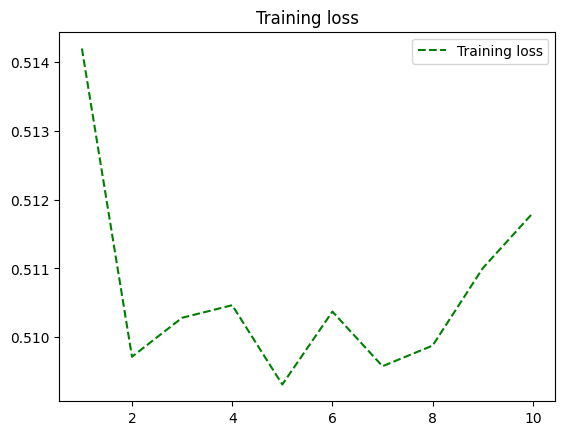

47/47 [==============================] - 0s 833us/step - loss: 0.4942 - accuracy: 0.8047
LOSS:  0.4941718280315399
ACCURACY 0.8046666383743286
47/47 [==============================] - 0s 503us/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1207
           1       0.00      0.00      0.00       293

    accuracy                           0.80      1500
   macro avg       0.40      0.50      0.45      1500
weighted avg       0.65      0.80      0.72      1500

MODEL 1
(128, 64, 0)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               1408      
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


240/240 [==============================] - 2s 5ms/step - loss: 0.5488 - accuracy: 0.7941 - val_loss: 0.5003 - val_accuracy: 0.8012
Epoch 2/20
240/240 [==============================] - 1s 4ms/step - loss: 0.5086 - accuracy: 0.7941 - val_loss: 0.5001 - val_accuracy: 0.8012
Epoch 3/20
240/240 [==============================] - 1s 4ms/step - loss: 0.5088 - accuracy: 0.7941 - val_loss: 0.4994 - val_accuracy: 0.8012
Epoch 4/20
240/240 [==============================] - 1s 4ms/step - loss: 0.5085 - accuracy: 0.7941 - val_loss: 0.5000 - val_accuracy: 0.8012
Epoch 5/20
240/240 [==============================] - 1s 4ms/step - loss: 0.5086 - accuracy: 0.7941 - val_loss: 0.4988 - val_accuracy: 0.8012
Epoch 6/20
240/240 [==============================] - 1s 4ms/step - loss: 0.5088 - accuracy: 0.7941 - val_loss: 0.4988 - val_accuracy: 0.8012
Epoch 7/20
240/240 [==============================] - 1s 3ms/step - loss: 0.5086 - accuracy: 0.7941 - val_loss: 0.4992 - val_accuracy: 0.8012
Epoch 8/20
240/24

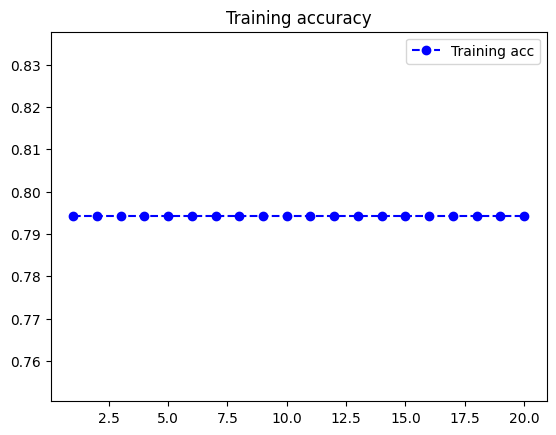

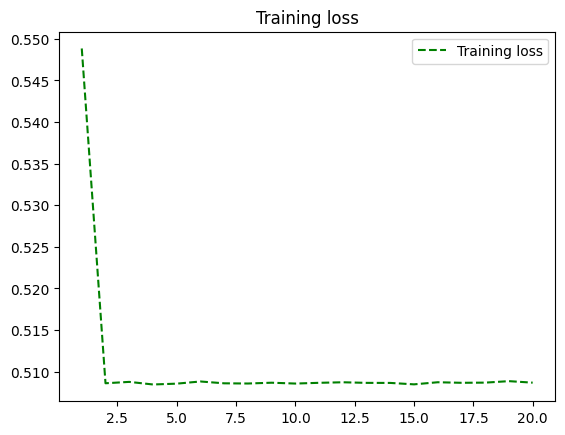

47/47 [==============================] - 0s 921us/step - loss: 0.4940 - accuracy: 0.8047
LOSS:  0.49395105242729187
ACCURACY 0.8046666383743286
47/47 [==============================] - 0s 539us/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1207
           1       0.00      0.00      0.00       293

    accuracy                           0.80      1500
   macro avg       0.40      0.50      0.45      1500
weighted avg       0.65      0.80      0.72      1500

MODEL 1
(128, 64, 32)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               1408      
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


240/240 [==============================] - 2s 4ms/step - loss: 0.4916 - accuracy: 0.7932 - val_loss: 0.4321 - val_accuracy: 0.8153
Epoch 2/30
240/240 [==============================] - 1s 4ms/step - loss: 0.4483 - accuracy: 0.8099 - val_loss: 0.4103 - val_accuracy: 0.8376
Epoch 3/30
240/240 [==============================] - 1s 5ms/step - loss: 0.4355 - accuracy: 0.8193 - val_loss: 0.4212 - val_accuracy: 0.8282
Epoch 4/30
240/240 [==============================] - 1s 5ms/step - loss: 0.4211 - accuracy: 0.8239 - val_loss: 0.4007 - val_accuracy: 0.8400
Epoch 5/30
240/240 [==============================] - 1s 4ms/step - loss: 0.4114 - accuracy: 0.8297 - val_loss: 0.3870 - val_accuracy: 0.8459
Epoch 6/30
240/240 [==============================] - 1s 5ms/step - loss: 0.3972 - accuracy: 0.8378 - val_loss: 0.3776 - val_accuracy: 0.8471
Epoch 7/30
240/240 [==============================] - 1s 5ms/step - loss: 0.3873 - accuracy: 0.8425 - val_loss: 0.3703 - val_accuracy: 0.8459
Epoch 8/30
240/24

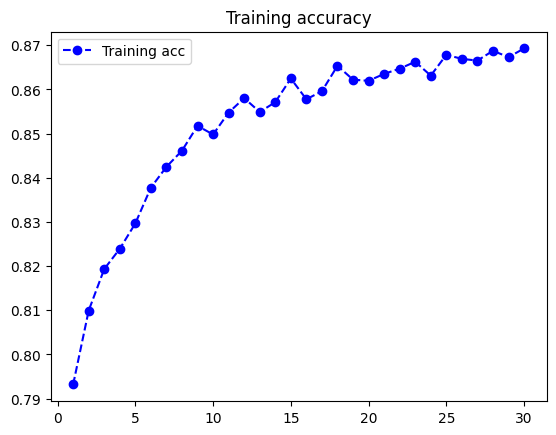

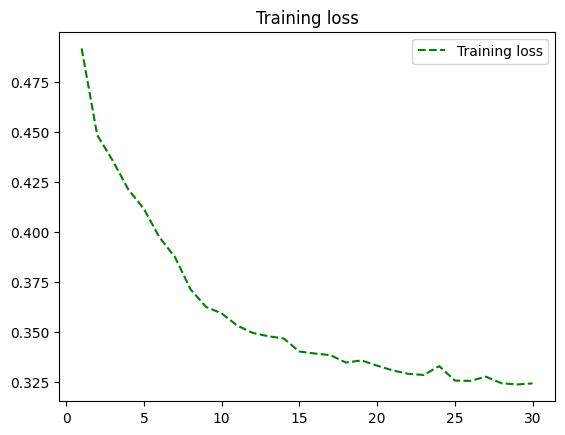

47/47 [==============================] - 0s 737us/step - loss: 0.3550 - accuracy: 0.8540
LOSS:  0.3549657464027405
ACCURACY 0.8539999723434448
47/47 [==============================] - 0s 458us/step
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1207
           1       0.79      0.34      0.48       293

    accuracy                           0.85      1500
   macro avg       0.82      0.66      0.70      1500
weighted avg       0.85      0.85      0.83      1500



In [41]:
v = [((128,0,0),10,0.1),((128,64,0),20,0.01),((128,64,32),30,0.001)]
from sklearn.metrics import classification_report

def create_model(params):
    return tf.keras.Sequential([
            Input(shape=(10,)),
            tf.keras.layers.Dense(params[0], activation='relu'),
            tf.keras.layers.Dense(params[1], activation='relu'),
            tf.keras.layers.Dense(params[2],activation='relu'),
            tf.keras.layers.Dense(1,activation='sigmoid')
          ])

for value in v:
    print("MODEL 1")
    print(value[0])
    model = create_model(value[0])
    print(model.summary())
    epochs = value[1]
    lr = value[2]
    
    adam = tf.keras.optimizers.Adam(learning_rate=lr)

    model.compile(optimizer=adam,loss=tf.keras.losses.BinaryCrossentropy(), metrics='accuracy')
    
    batch_size = 32
    history = model.fit(input_train, output_train, epochs=epochs,validation_split=0.1)
    
    acc = history.history['accuracy']
    loss = history.history['loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo--', label='Training acc')
    plt.title('Training accuracy')
    plt.legend()
    
    plt.figure()
    
    plt.plot(epochs, loss, 'g--', label='Training loss')
    plt.title('Training loss')
    plt.legend()
    
    plt.show()
    
    loss, accuracy = model.evaluate(input_test, output_test)

    print("LOSS: ",loss)
    print("ACCURACY", accuracy)

    output = model.predict(input_test)
    print(classification_report(output_test.numpy().tolist(),np.round(np.squeeze(output))))